In [93]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

#係數建立區

base_columns = 11
base_rows = 11


In [94]:
#獨立功能塊(展示) Start

#列印table fuction

def print_title(name,n_st = " " ):
    n_st = str(n_st)
    if n_st == " ":
        name =" "+name+" "
    else:
        name =" 訓練 "+n_st+" 次 "+name+" "
    print(name.center(60,"="))

#圖像化Q_label功能(熱點圖)start

#Q_table 三維矩陣依最大值轉換成二維後依熱力圖成像

def q_table_max_pain(q_table ,base_columns,base_rows,n_st):
    max_q_table = np.zeros((base_columns,base_rows))
    for x in range (0,base_rows):

        for y in range (0,base_columns):
            max_q = np.argmax(q_table[y,x])
            max_q_value= q_table[y,x,max_q]
            #max_q_value = int(np.round(max_q_value,0))
            max_q_table[y,x] = max_q_value
            
    
    print_title("q_table",n_st)
    #print(max_q_table)

    title = "Q table from train "
    title = title + str(n_st)
    title = title + " Times"

    ax = sns.heatmap(max_q_table,vmax=100,vmin= -10,cmap = "RdBu_r",linewidths= 0.3 ,center = 0,annot= True,fmt=".0f")
    plt.title(title)
    plt.plot()
    plt.show()
    
#圖像化Q_label功能(熱點圖)END


#獨立功能塊 end

In [95]:
#(二-1)初始化 table fuction 地圖及Q_table

def init_table():
    #base table create
    base_table = np.full((base_columns, base_rows), -100)
    base_table[0,5] = 100
    for i in range(0, 11):
        base_table[5, i] = -1
        base_table[9, i] = -1
    for i in range(1, 10):
        base_table[1, i] = -1
        base_table[7, i] = -1
    for i in range(1, 8):
        base_table[3, i] = -1    
    base_table[2,1] = -1
    base_table[2,7] = -1
    base_table[2,9] = -1
    base_table[3,9] = -1
    base_table[4,3] = -1
    base_table[4,7] = -1
    base_table[6,5] = -1
    base_table[8,3] = -1
    base_table[8,7] = -1
    #Q-values table create
    q_table = np.zeros((base_columns, base_rows ,4))
    return base_table, q_table

#(二-2)初始位置

def random_start(base_table):
    output = 0
    while output == 0:
        t_x = np.random.randint(0,11)
        t_y = np.random.randint(0,11)
        z = base_table[t_y, t_x]
        if z == -1 :
            return t_y,t_x
            output = 1
        else :
            continue

#(二-3)start

#是否嘗試新路線 輸出 0 為是；輸出 1 為否
def try_new_action(try_new):
    action = rd.uniform(0,1)
    if action > try_new:
        return 0
    else:
        return 1

#隨機移動方向 0上 1右 2下 3左

def random_direction():
    t_direction = np.random.randint(0,4)
    return t_direction

#(二-3) end 決定t時的方向
def get_t_direction(q_table,t_y,t_x,try_new = 0.9):
    try_new_action_value = try_new_action(try_new)
    if try_new_action_value == 0:
        t_direction = random_direction()
    elif try_new_action_value == 1:
        t_direction = np.argmax(q_table[t_y,t_x])
    else:
        print("get_t_direction error")
    return t_direction

#t位置改變至t+1
#輸入t時xy座標
#輸出t+1時xy 座標為 t_add_x,t_add_y

def t_add_loadcation(t_y,t_x,t_direction):

    if t_direction == 0 and t_y >= 1: 
        t_y = t_y - 1
    elif t_direction == 1 and t_x <=9:
        t_x = t_x + 1

    elif t_direction == 2 and t_y<=9:
        t_y = t_y + 1
    elif t_direction == 3 and t_x >= 1:
        t_x = t_x - 1
    else:
        t_x = t_x
        t_y = t_y
    return t_y,t_x
    

In [96]:
#計算分數及分數更新
# 1.reward = t+1 reward  
# 2.new_max_fraction = t+1 所有方向中最高state值
# 3.t_direction = t 過來的方向的Q_value值
# 4.attenuation = 衰減率 (預設0.9)
# 5.study = 學習率 (預設0.9)
# 6.輸出為 new_q_direction 為t位置時往t+1方向，新的Q值
# 7.更新Qtable值

def q_value_calculate(base_table,q_table,t_y,t_x,t_add_y,t_add_x, t_direction , attenuation = 0.90 , study = 0.90):
    
    reward = base_table[t_add_y,t_add_x]
    new_max_fraction = np.argmax(q_table[t_add_y,t_add_x])
    t_add_max_q = q_table[t_add_y,t_add_x,new_max_fraction]
    t_direction_value = q_table[t_y,t_x,t_direction]

    td = reward + (attenuation*t_add_max_q) - t_direction_value
    new_q_direction = (td * study) + t_direction_value

    q_table[t_y,t_x,t_direction] = new_q_direction
    return q_table

#訓練
def train_q(train ,base_table,q_table):
    train_n = 0
    while train_n < train :
        train_t = 1
        n = 0
        t_y , t_x = random_start(base_table)
        while train_t == 1 :
            n = n+1
            t_direction = get_t_direction(q_table,t_y,t_x)
            t_add_y,t_add_x = t_add_loadcation(t_y,t_x,t_direction)
            q_table = q_value_calculate(base_table,q_table,t_y,t_x,t_add_y,t_add_x, t_direction)
            t_x = t_add_x
            t_y = t_add_y
            #????
            if base_table[t_add_y,t_add_x] == -100:
                train_t = 0
                train_n = train_n + 1
                break
            elif base_table[t_add_y,t_add_x] == 100:
                train_t = 0
                train_n = train_n + 1
                break

            elif base_table[t_add_y,t_add_x] == -1:
                continue    
            else : 
                print("ERROR_by_train",base_table[t_add_y,t_add_x])
            break
            #????
    
    pass_data = try_q_table(base_table,q_table)

    #print("合格率" ,np.round(pass_data/8*100,0) ,"%")
    return q_table ,pass_data
        

In [97]:
#最短路徑

def get_short_route(base_table,q_table,t_y,t_x):
    sys_short_route = 1
    t_route = []
    if base_table[t_y,t_x] == -1 :
        short_times = int(0)
        
        
        while sys_short_route == 1:
            short_times = short_times + 1
            t_direction = get_t_direction(q_table,t_y,t_x,try_new = 1)
            t_add_y,t_add_x = t_add_loadcation(t_y,t_x,t_direction)
            t_route.append([t_y,t_x])
            
            #t_direction_route.append(t_direction)
            t_x = t_add_x
            t_y = t_add_y
            error_value = 0
            if short_times >= 19 or base_table[t_y,t_x] == -100 :
                error_value = 1
                
                return error_value,t_route,short_times
            elif base_table[t_y,t_x] == -1 :
                continue
            elif base_table[t_y,t_x] == 100 :

                return error_value,t_route,short_times
    else:
        error_value = 1
        return error_value,t_route,short_times


#最短路徑繪製
def pain_short_route(base_table,t_route,t_y,t_x,short_times):
    short_table = base_table.copy()
    for i in range (len(t_route)):
        short_table[t_route[i][0],t_route[i][1]] = 50
        

    title = " short route by (" + str(t_x)+" , "+str(t_y)+")"
    sns.heatmap(short_table,vmax=100,vmin= -100,cmap = "RdBu_r",linewidths= 0.3 ,center = 0)
    plt.title(title)
    plt.plot()
    plt.show()

#最短路徑測試模型可用度
"""
#只參照最遠兩點訓練-1(共3)
def try_q_table_limit (base_table,q_table):
    pass_data = 0
    #1
    error_value,t_route,short_times = get_short_route(base_table,q_table,9,0)
    if error_value == 0 and short_times == 18:
        pass_data = pass_data + 1
    #2
    error_value,t_route,short_times = get_short_route(base_table,q_table,9,10)
    if error_value == 0 and short_times == 18:
        pass_data = pass_data + 1
    return pass_data
"""    

def try_q_table (base_table,q_table):
    pass_data = 0
    #1
    error_value,t_route,short_times = get_short_route(base_table,q_table,9,0)
    if error_value == 0 and short_times == 18:
        pass_data = pass_data + 1
    #2
    error_value,t_route,short_times = get_short_route(base_table,q_table,9,10)
    if error_value == 0 and short_times == 18:
        pass_data = pass_data + 1
    
    #3
    error_value,t_route,short_times = get_short_route(base_table,q_table,9,5)
    if error_value == 0 and short_times == 17:
        pass_data = pass_data + 1
    #4
    error_value,t_route,short_times = get_short_route(base_table,q_table,7,1)
    if error_value == 0 and short_times == 15:
        pass_data = pass_data + 1
    #5
    error_value,t_route,short_times = get_short_route(base_table,q_table,7,9)
    if error_value == 0 and short_times == 15:
        pass_data = pass_data + 1
    #6
    error_value,t_route,short_times = get_short_route(base_table,q_table,5,0)
    if error_value == 0 and short_times == 14:
        pass_data = pass_data + 1
    #7
    error_value,t_route,short_times = get_short_route(base_table,q_table,5,10)
    if error_value == 0 and short_times == 10:
        pass_data = pass_data + 1
    #8
    error_value,t_route,short_times = get_short_route(base_table,q_table,3,9)
    if error_value == 0 and short_times == 7:
        pass_data = pass_data + 1
    
    return pass_data

def auto_train_function(base_table,q_table):
    auto_train = 0
    train = 0
    while auto_train == 0:
        q_table ,pass_data= train_q(1,base_table,q_table)
        #pass_data = try_q_table(base_table,q_table)
        """
        只參照最遠兩點訓練-2(共3)
        pass_data = try_q_table_limit(base_table,q_table)
        """
        train = train + 1 
        if pass_data < 8:
            continue
        elif pass_data == 8:
            auto_train = 1
            return q_table,train
        """
        只參照最遠兩點訓練-3(共3)
        if pass_data < 2:
            continue
        elif pass_data == 2:
            auto_train = 1
            return q_table,train
        """


預訓練完成，已訓練  393  次  合格率 0.0 %
===================== 訓練 393 次 q_table =====================


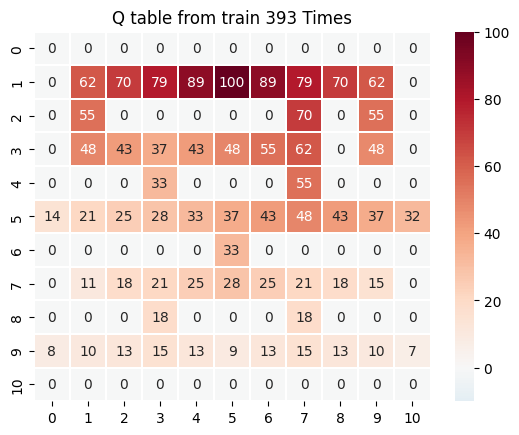

[[9, 0], [9, 1], [9, 2], [9, 3], [8, 3], [7, 3], [7, 4], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5]]
從( 0 , 9 )出發，共 18 步


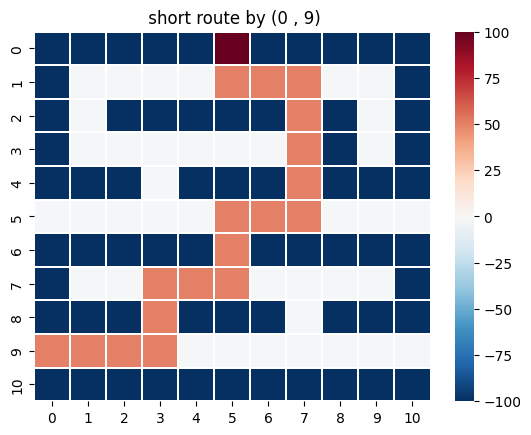

[[9, 10], [9, 9], [9, 8], [9, 7], [8, 7], [7, 7], [7, 6], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5]]
從( 10 , 9 )出發，共 18 步


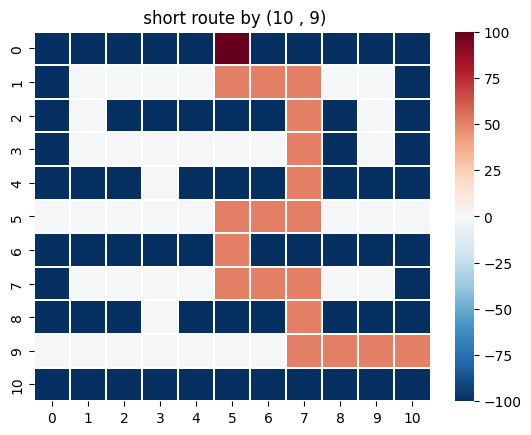

預訓練完成，已訓練  100  次  合格率 0.0 %
===================== 訓練 100 次 q_table =====================


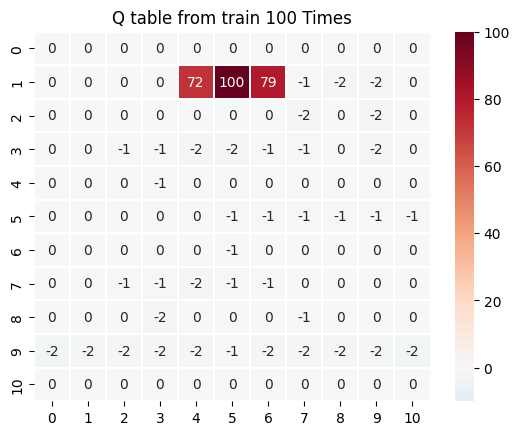

再訓練完成，已訓練  200  次  合格率 38.0 %
===================== 訓練 200 次 q_table =====================


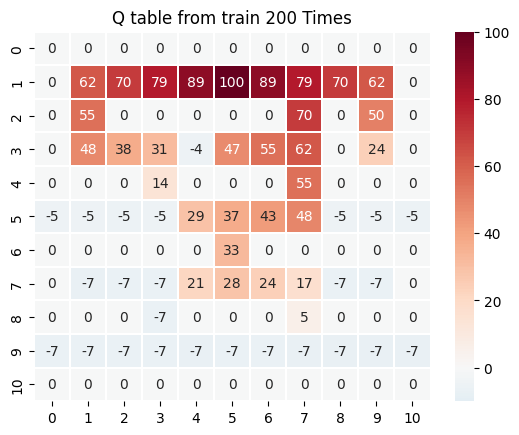

再訓練完成，已訓練  300  次  合格率 88.0 %
===================== 訓練 300 次 q_table =====================


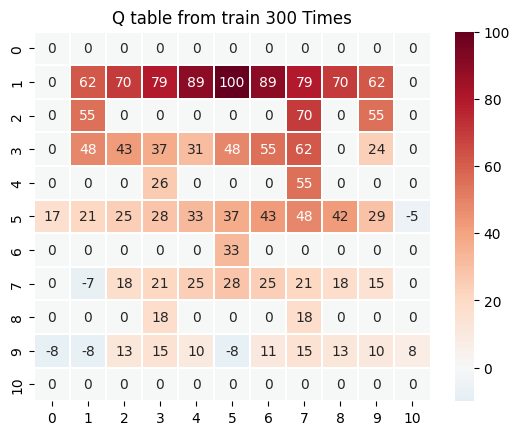

再訓練完成，已訓練  400  次  合格率 100.0 %
===================== 訓練 400 次 q_table =====================


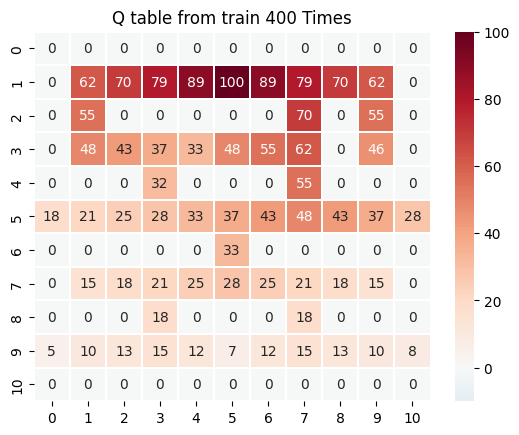

[[9, 0], [9, 1], [9, 2], [9, 3], [8, 3], [7, 3], [7, 4], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5]]
從( 0 , 9 )出發，共 18 步


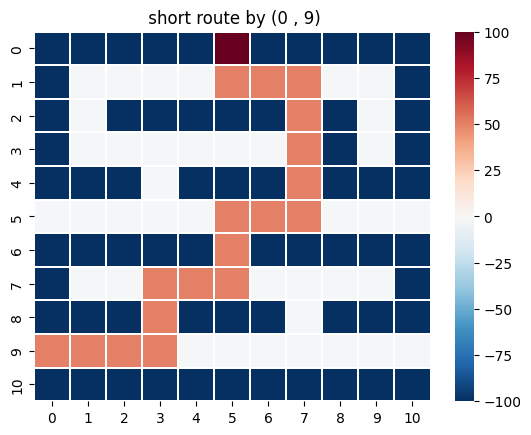

[[3, 6], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5]]
從( 6 , 3 )出發，共 6 步


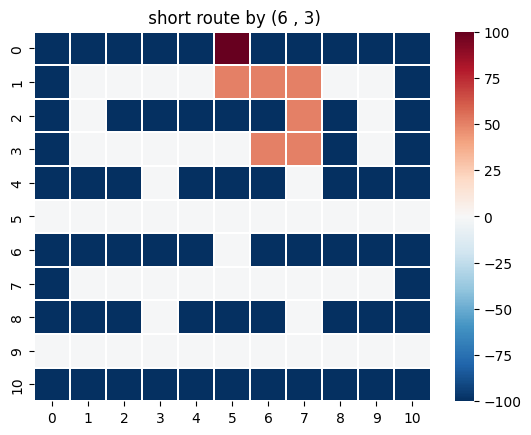

[[4, 3], [3, 3], [3, 2], [3, 1], [2, 1], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5]]
從( 3 , 4 )出發，共 10 步


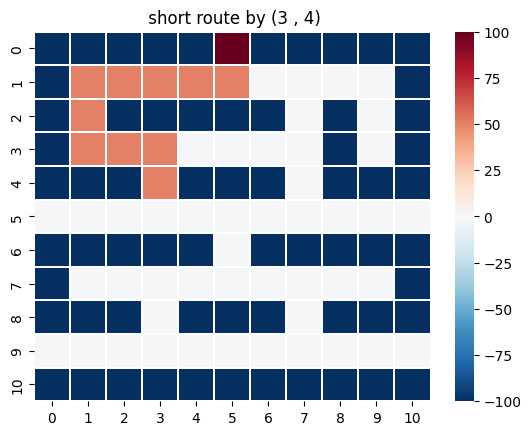

In [100]:
#運行區

start_value = 1 
while start_value == 1:
    base_table , q_table = init_table()
    all_train = 0
    train = int(input("輸入預訓練次數:(輸入0為自動訓練) "))
    if train == 0:
        q_table,train = auto_train_function(base_table,q_table)
    else:
        q_table,pass_data = train_q(train,base_table,q_table)
    all_train = train
    
    print("預訓練完成，已訓練 ",all_train," 次  合格率",np.round(pass_data/8*100,0) ,"%")

    
    q_table_max_pain(q_table,base_columns,base_rows,all_train)
    

    command_value = 1
    while command_value == 1:
        
        command_table = [1,2,3,4,5]
        command = int(input("1_再訓練  2_取得最短路徑  3_展示 Q table  4_重新訓練  5_離開 "))

        if command not in command_table:
            print("輸入錯誤")
            continue
        elif command == 1:
            train = int(input("輸入再訓練次數: "))
            q_table,pass_data = train_q(train,base_table,q_table)
            all_train = all_train + train
            
            print("再訓練完成，已訓練 ",all_train," 次  合格率",np.round(pass_data/8*100,0) ,"%")
            q_table_max_pain(q_table,base_rows,base_columns,all_train)
            continue
        elif command == 2:

            t_x = int(input("輸入 x 座標"))
            t_y = int(input("輸入 y 座標"))
            
            sys_input_chick = [0,1,2,3,4,5,6,7,8,9,10]
            
            if t_x not in sys_input_chick:
                print(" x 輸入錯誤")
                continue
            elif t_y not in sys_input_chick:
                print(" y 輸入錯誤")
                continue
            else:
            
                error_value,t_route,short_times = get_short_route(base_table,q_table,t_y,t_x)


            if error_value == 1:
                print("訓練次數不足")
            elif error_value == 0 :
                print(t_route)
                print("從(",t_x,",",t_y,")出發，共",short_times,"步")
                pain_short_route(base_table,t_route,t_y,t_x,short_times)
            continue
        elif command == 3:
            q_table_max_pain(q_table,base_rows,base_columns,all_train)
            continue
        elif command == 4:
            command_value = 0
            break
        elif command == 5:
            command_value = 0
            start_value = 0
        else :
            continue

<Axes: >

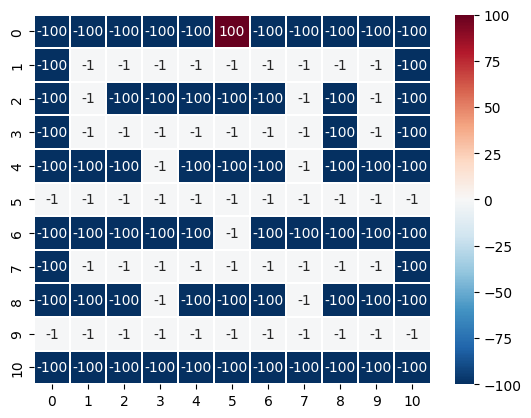

In [99]:
sns.heatmap(base_table,vmax=100,vmin= -100,cmap = "RdBu_r",fmt= "d",annot= True ,linewidths= 0.3 ,center = 0)